# Phase 1 

# RFM with LTV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding = 'ANSI')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


# Hypothesis Testing
1. Lead Time Variance (Actual vs Scheduled Shiping)

In [4]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

actual = df["Days for shipping (real)"]
scheduled = df["Days for shipment (scheduled)"]

t_stat, p_value_ttest = stats.ttest_rel(actual, scheduled)
print("Paired t-test:")
print(f"T-statistic: {t_stat}, P-value: {p_value_ttest}")
if p_value_ttest < 0.05:
    print("Reject H0: There is a significant difference in lead time.")
else:
    print("Fail to reject H0: No significant difference in lead time.")

Paired t-test:
T-statistic: 161.2361121465159, P-value: 0.0
Reject H0: There is a significant difference in lead time.


2. Late Delivery Risk 

In [5]:
# H0: The proportion of late deliveries is equal to 50% (p = 0.5).
# H1: The proportion of late deliveries is greater than 50% (p > 0.5).
late_deliveries = df["Late_delivery_risk"]

count_late = np.sum(late_deliveries == 1)
n = len(late_deliveries)

p_null = 0.5  
# Sample proportion of late deliveries
p_sample = count_late / n

z_stat = (p_sample - p_null) / np.sqrt(p_null * (1 - p_null) / n)
p_value_ztest = 1 - stats.norm.cdf(z_stat)  # One-tailed p-value for H1: p > 0.5

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_ztest:.4f}")

if p_value_ztest < 0.05:
    print("Reject H0: Proportion of late deliveries is significantly greater than 50%.")
    print("Alternative Hypothesis (H1): The proportion of late deliveries is greater than 50%.")
else:
    print("Fail to reject H0: No significant evidence to suggest the proportion is greater than 50%.")

Z-statistic: 41.0356
P-value: 0.0000
Reject H0: Proportion of late deliveries is significantly greater than 50%.
Alternative Hypothesis (H1): The proportion of late deliveries is greater than 50%.


In [6]:
print(f"Sample Proportion of Late Deliveries: {p_sample:.4f}")

Sample Proportion of Late Deliveries: 0.5483


In [7]:
print(f"Total deliveries: {n}")
print(f"Count of late deliveries: {count_late}")

Total deliveries: 180519
Count of late deliveries: 98977


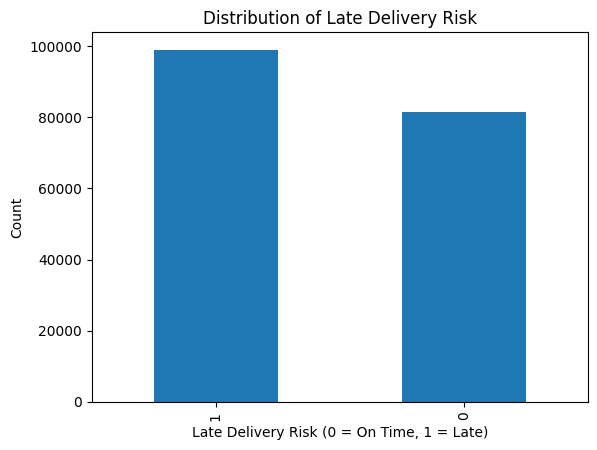

In [8]:
import matplotlib.pyplot as plt
df["Late_delivery_risk"].value_counts().plot(kind="bar")
plt.title("Distribution of Late Delivery Risk")
plt.xlabel("Late Delivery Risk (0 = On Time, 1 = Late)")
plt.ylabel("Count")
plt.show()

3. Sales as per Customer Segment

C:\Users\shiva\AppData\Local\Temp\ipykernel_26656\3164265491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Customer Segment', y='Sales', palette='pastel')


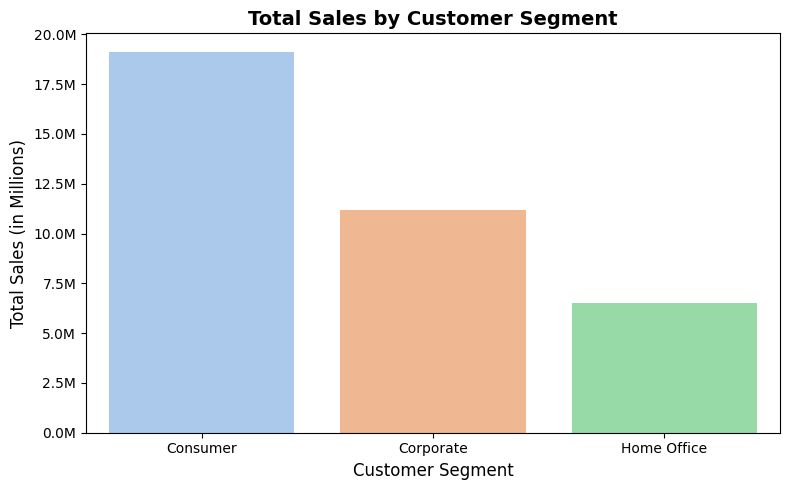

<function tuple.count(value, /)>

In [9]:
df_grouped = df.groupby('Customer Segment')['Sales'].sum().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(data=df_grouped, x='Customer Segment', y='Sales', palette='pastel')
plt.title('Total Sales by Customer Segment', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Sales (in Millions)', fontsize=12)

formatter = mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()
df['Customer Segment'].shape.count


In [10]:
unique_segments = df["Customer Segment"].nunique()
print(f"Number of unique customer segments: {unique_segments}")

# Display segment names
print(df["Customer Segment"].unique())

Number of unique customer segments: 3
['Consumer' 'Home Office' 'Corporate']


In [11]:
segment_counts = df["Customer Segment"].value_counts()
print(segment_counts)

Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64


- (Sales and Customer Segment) 

In [12]:
# Null Hypothesis (H0): There is no significant difference in sales across customer segments.
# Alternative Hypothesis (H1): At least one customer segment has significantly different sales."

consumer_sales = df[df['Customer Segment'] == 'Consumer']['Sales']
corporate_sales = df[df['Customer Segment'] == 'Corporate']['Sales']
home_office_sales = df[df['Customer Segment'] == 'Home Office']['Sales']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(consumer_sales, corporate_sales, home_office_sales)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sales across customer segments.")
    print("Alternative Hypothesis (H1): At least one customer segment has significantly different sales.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

F-statistic: 2.4491424147561487
P-value: 0.0863704922206117
Fail to reject the null hypothesis: There is no significant difference.


In [13]:
segment_sales = df.groupby("Customer Segment")["Sales"].mean()
segment_sales

Customer Segment
Consumer       204.224313
Corporate      203.843962
Home Office    202.337802
Name: Sales, dtype: float64

In [14]:
mean_sales_pivot = pd.pivot_table(df, values='Sales', index='Customer Segment', columns='Market', aggfunc='mean')
print(mean_sales_pivot)

Market                Africa      Europe       LATAM  Pacific Asia        USCA
Customer Segment                                                              
Consumer          197.675061  217.234769  198.873554    201.412362  196.956483
Corporate         198.343967  215.703694  199.956357    201.118691  195.177785
Home Office       195.892890  214.897608  198.866217    197.012646  196.740556


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [16]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


C:\Users\shiva\AppData\Local\Temp\ipykernel_26656\2486003117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Delivery Status', palette='viridis')


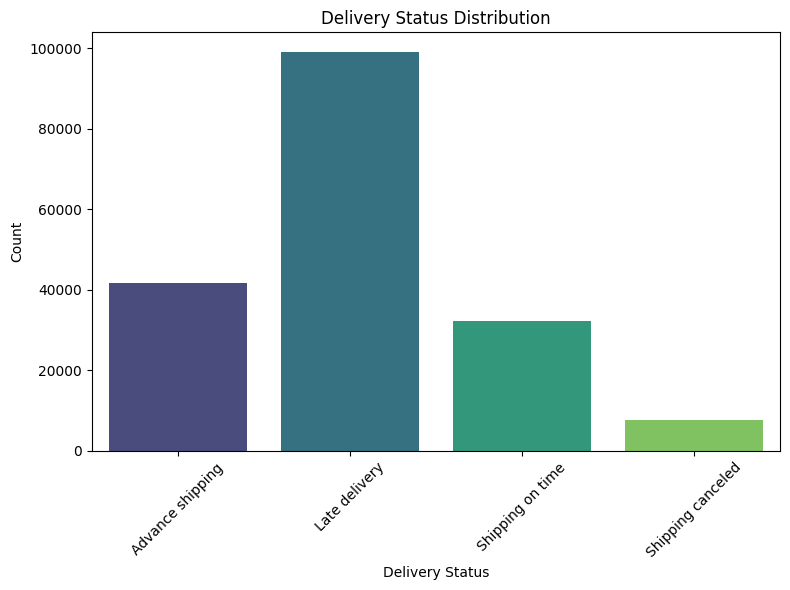

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Delivery Status', palette='viridis')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

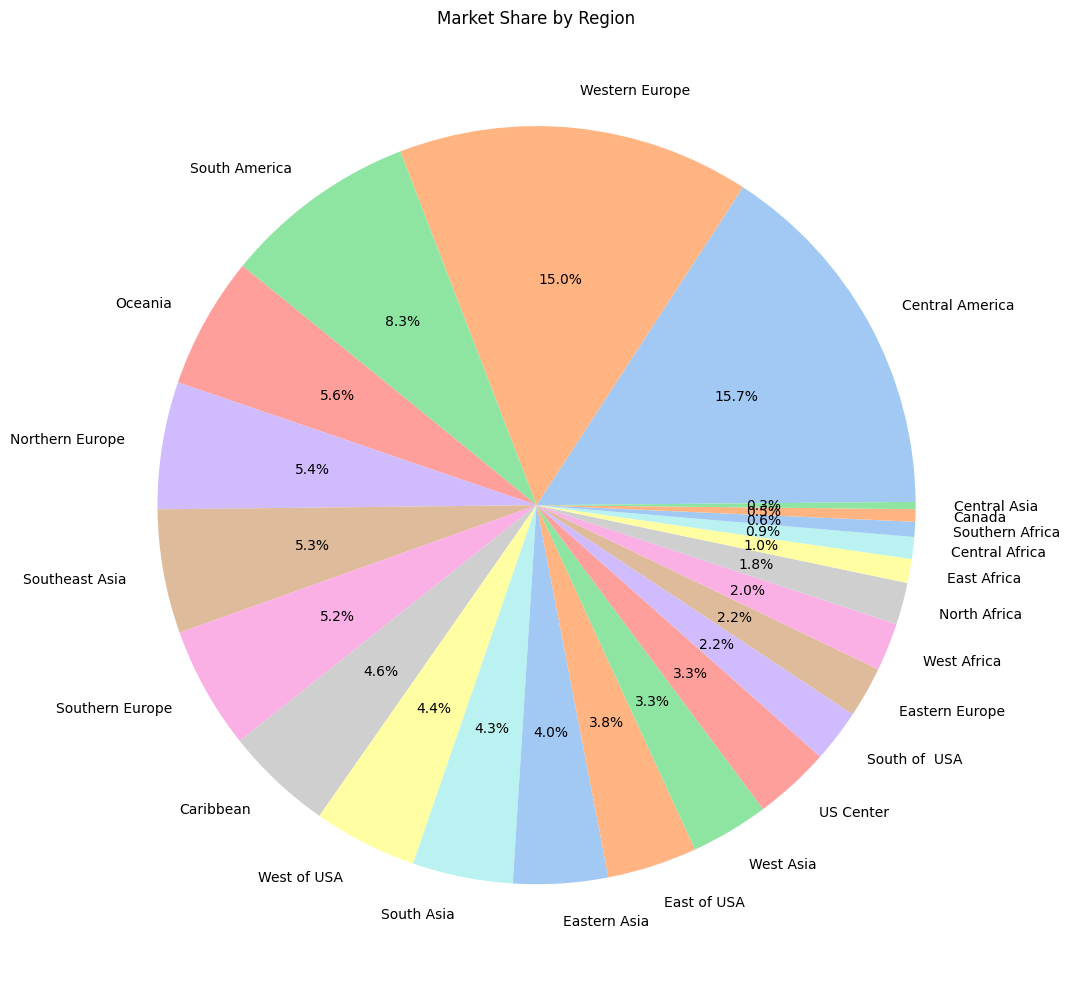

In [18]:
plt.figure(figsize=(18, 10))
df['Order Region'].value_counts().plot.pie(
    autopct='%3.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=0.5
,
    shadow=False
)
plt.title('Market Share by Region')
plt.ylabel('')  # Removes y-axis label for cleaner look
plt.tight_layout()
plt.show()

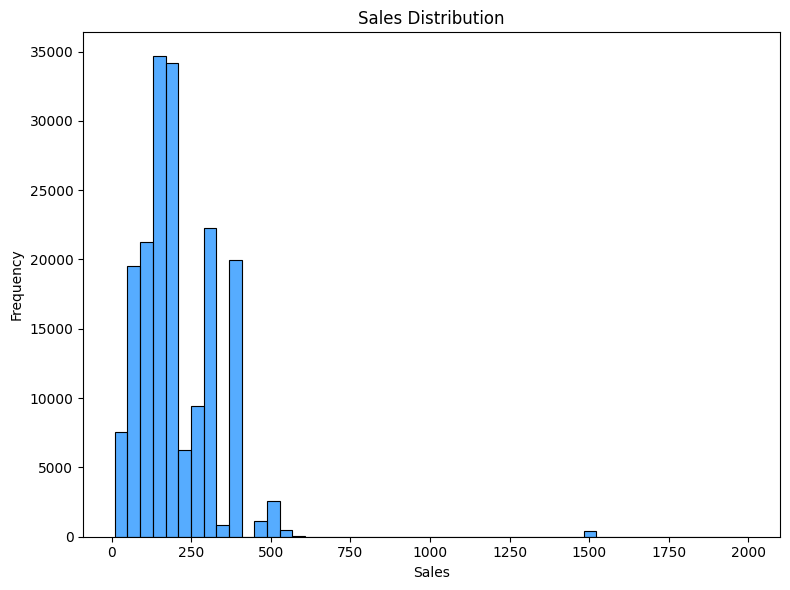

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=50, kde=False, color='dodgerblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# PART-1(RFM with Lead Time Variance)

In [20]:
# Dropping columns
columns_to_drop = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
    'Customer City', 'Customer State', 'Customer Street', 'Customer Zipcode',
    'Category Id', 'Category Name', 'Department Id', 'Department Name',
    'Latitude', 'Longitude', 'Product Card Id', 'Product Category Id',
    'Product Description', 'Product Image', 'Order Item Cardprod Id',
    'Order Item Id', 'Order Item Discount', 'Order Item Discount Rate',
    'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
    'Order Item Product Price', 'Order Status', 'Order Zipcode', 
    'Order City', 'Order Country', 'Order Customer Id', 'Shipping Mode'
]

df_1 = df.drop(columns=columns_to_drop, axis=1)

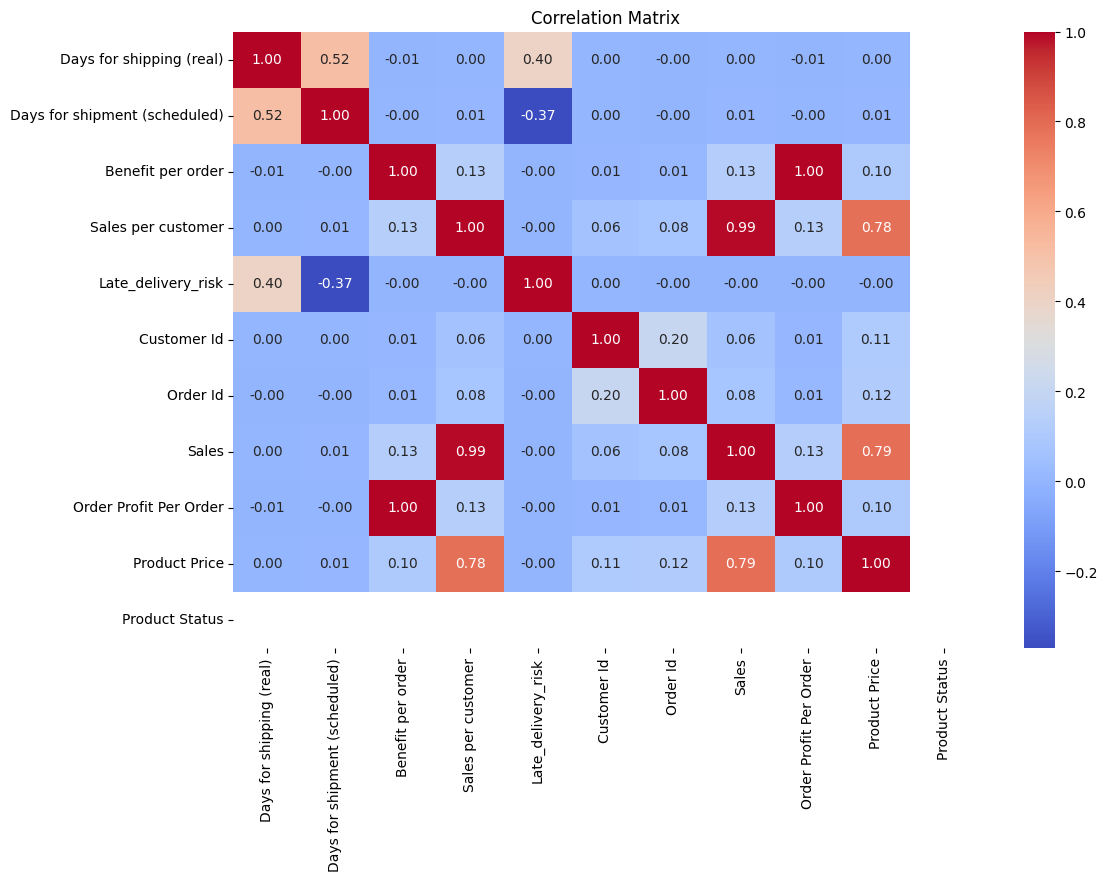

In [21]:
numerical_features = df_1.select_dtypes(include=['int64','float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Insights:

- Sales and Sales per customer have a very high correlation (0.99), indicating redundancy.
- Product Price is moderately correlated with Sales (0.79), suggesting that higher-priced products contribute significantly to overall sales.
- Features like Customer Id, Order Id, and Product Status show no correlation with other variables.
- Weak correlations with most variables, except for itself and Order Profit Per Order (1.0 correlation, which is expected since they might be directly derived).

In [22]:
df_1['order date (DateOrders)'] = pd.to_datetime(df_1['order date (DateOrders)'])

In [23]:
# lead time variance
df_1['Lead Time Variance'] = df_1['Days for shipment (scheduled)'] - df_1['Days for shipping (real)']


print(df_1[['Days for shipment (scheduled)', 'Days for shipping (real)', 'Lead Time Variance']])

        Days for shipment (scheduled)  Days for shipping (real)  \
0                                   4                         3   
1                                   4                         5   
2                                   4                         4   
3                                   4                         3   
4                                   4                         2   
...                               ...                       ...   
180514                              4                         4   
180515                              2                         3   
180516                              4                         5   
180517                              4                         3   
180518                              4                         4   

        Lead Time Variance  
0                        1  
1                       -1  
2                        0  
3                        1  
4                        2  
...                  

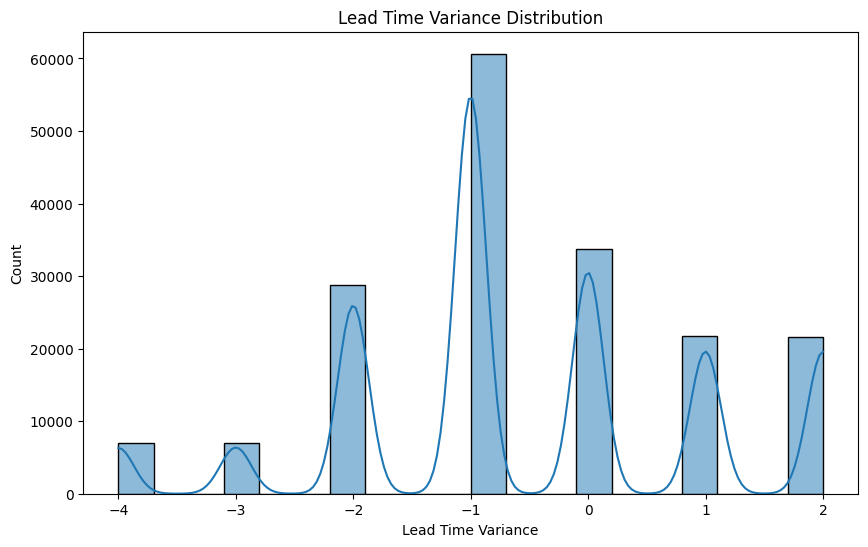

In [26]:
# Visualize lead time variance
plt.figure(figsize=(10, 6))
sns.histplot(df_1['Lead Time Variance'], bins=20, kde=True)
plt.title('Lead Time Variance Distribution')
plt.show()

# RFM 

In [27]:
df_1['order date (DateOrders)'] = pd.to_datetime(df_1['order date (DateOrders)'])


reference_date = df_1['order date (DateOrders)'].max()

# Calculate RFM metrics for each customer
rfm = df_1.groupby('Customer Id').agg({
    'order date (DateOrders)': lambda x: (reference_date - x.max()).days,  # Recency
    'Order Id': 'nunique',                                                 # Frequency
    'Sales': 'sum'                                                         # Monetary
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

   Customer ID  Recency  Frequency     Monetary
0            1      792          1   499.950012
1            2      136          4  1819.730034
2            3      229          5  3537.680094
3            4      380          4  1719.630030
4            5      457          3  1274.750023


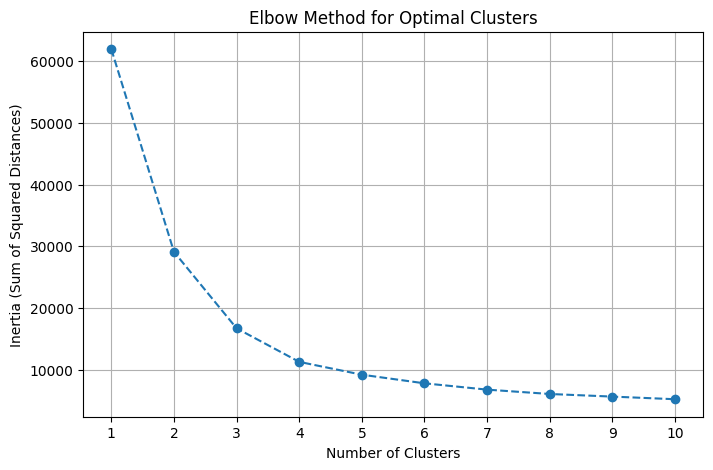

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = ['Monetary', 'Recency', 'Frequency']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(rfm[features])

# Elbow Method 
inertia = []  # List to store inertia values (sum of squared distances)

# Testing KMeans for cluster numbers from 1 to 10
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


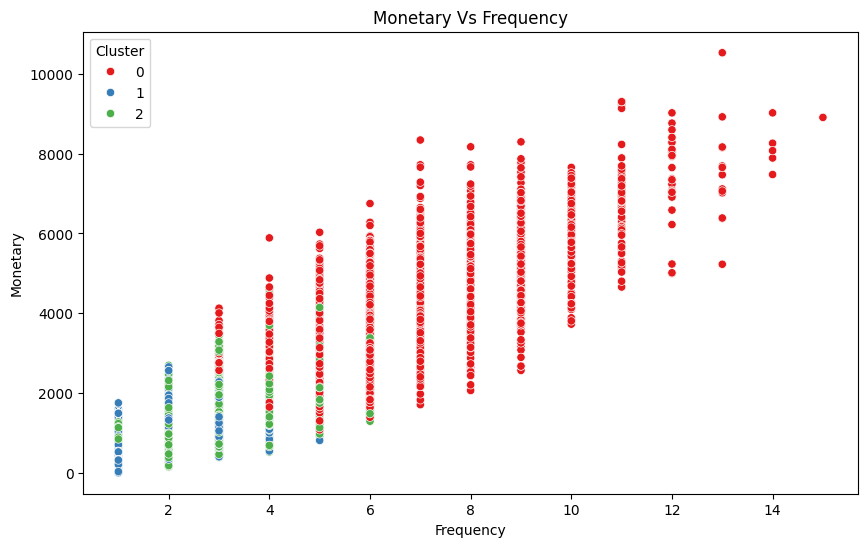

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set1')
plt.title('Monetary Vs Frequency')

plt.show()


# Insights:
- Red: This cluster appears to have the highest "Monetary" values across all frequencies. This suggests that this group represents customers with high spending and frequent purchases.
- Blue: This cluster shows a moderate "Monetary" value across frequencies. This group likely represents customers with average spending and frequency.
- Green: This cluster has the lowest "Monetary" values across frequencies. This group probably consists of customers with low spending and infrequent purchases.

# RFM with Lead time variance

In [24]:
df_1['Lead Time Variance'].unique()

array([ 1, -1,  0,  2, -2, -4, -3])

In [25]:
sorted_lt_variance = sorted(df_1['Lead Time Variance'].unique())
quantile_25 = pd.Series(sorted_lt_variance).quantile(0.25)

print(f"0.25 Quantile of Lead Time Variance: {quantile_25}")

0.25 Quantile of Lead Time Variance: -2.5


In [35]:
# Ensure 'Lead Time Variance' is in rfm
if 'Lead Time Variance' not in rfm.columns:
    rfm = rfm.merge(df_1[['Customer Id', 'Lead Time Variance']], left_on='Customer ID', right_on='Customer Id', how='left')
    rfm.drop(columns='Customer Id', inplace=True)  

churn_threshold = 180 # days
lead_time_threshold = -2

# Mark customers as churned based on Recency and Lead Time Variance
rfm['Churned'] = rfm.apply(lambda x: 1 if x['Recency'] > churn_threshold and x['Lead Time Variance'] < lead_time_threshold else 0, axis=1)

# Percentage of churned customers
churn_rate = rfm['Churned'].mean() * 100

print(f'Churn Rate: {churn_rate:.2f}%')

Churn Rate: 5.23%


- Churn Threshold:
180 days, which is the point where a customer is considered to be at risk of churn based on their Recency (how recently they made a purchase).

- Lead Time Variance Threshold:
This threshold is used to flag customers whose deliveries were considered late based on our analysis of the Lead Time Variance values. Any Lead Time Variance less than -2 will mark the customer as "churned."

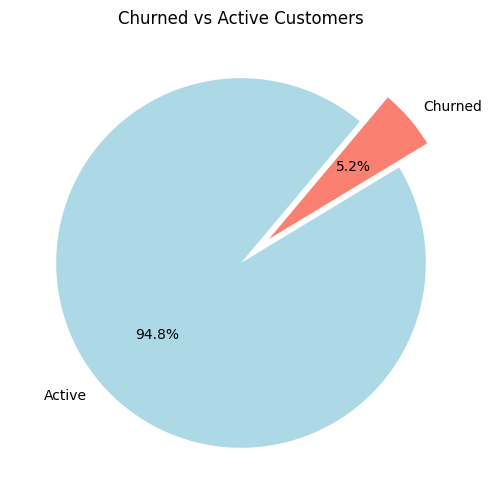

In [36]:
plt.figure(figsize=(10, 6))
rfm['Churned'].value_counts().plot.pie(
    labels=['Active', 'Churned'],
    autopct='%1.1f%%',
    colors=['lightblue', 'salmon'],
    startangle=50,
    explode=(0, 0.2),
    shadow=False
)
plt.title('Churned vs Active Customers')
plt.ylabel('')  
plt.show()